## **AML Assignment 1**

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
dataset_path = keras.utils.get_file("auto-mpg.data", 
            "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight','Accelaration','Model Year', 'Origin']



In [ ]:
dataset = pd.read_csv(dataset_path, names=column_names, na_values = "?", comment='\t', sep=" ", skipinitialspace = True)

•	Perform appropriate exploratory data analysis technique to treat missing values, to visualize the required plot etc.

In [ ]:
dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Accelaration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [ ]:
dataset.isnull().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Accelaration    0
Model Year      0
Origin          0
dtype: int64

In [ ]:
dataset = dataset.dropna()

In [ ]:
dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Accelaration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


•	Divide the data into train and test set with 80:20 ratio.

In [ ]:
train_dataset = dataset.sample(frac=0.8, random_state = 0)
test_dataset = dataset.drop(train_dataset.index) 

In [ ]:
train_dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Accelaration,Model Year,Origin
146,28.0,4,90.0,75.0,2125.0,14.5,74,1
282,22.3,4,140.0,88.0,2890.0,17.3,79,1
69,12.0,8,350.0,160.0,4456.0,13.5,72,1
378,38.0,4,105.0,63.0,2125.0,14.7,82,1
331,33.8,4,97.0,67.0,2145.0,18.0,80,3


In [ ]:
!pip install seaborn

In [ ]:
import seaborn as sb

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


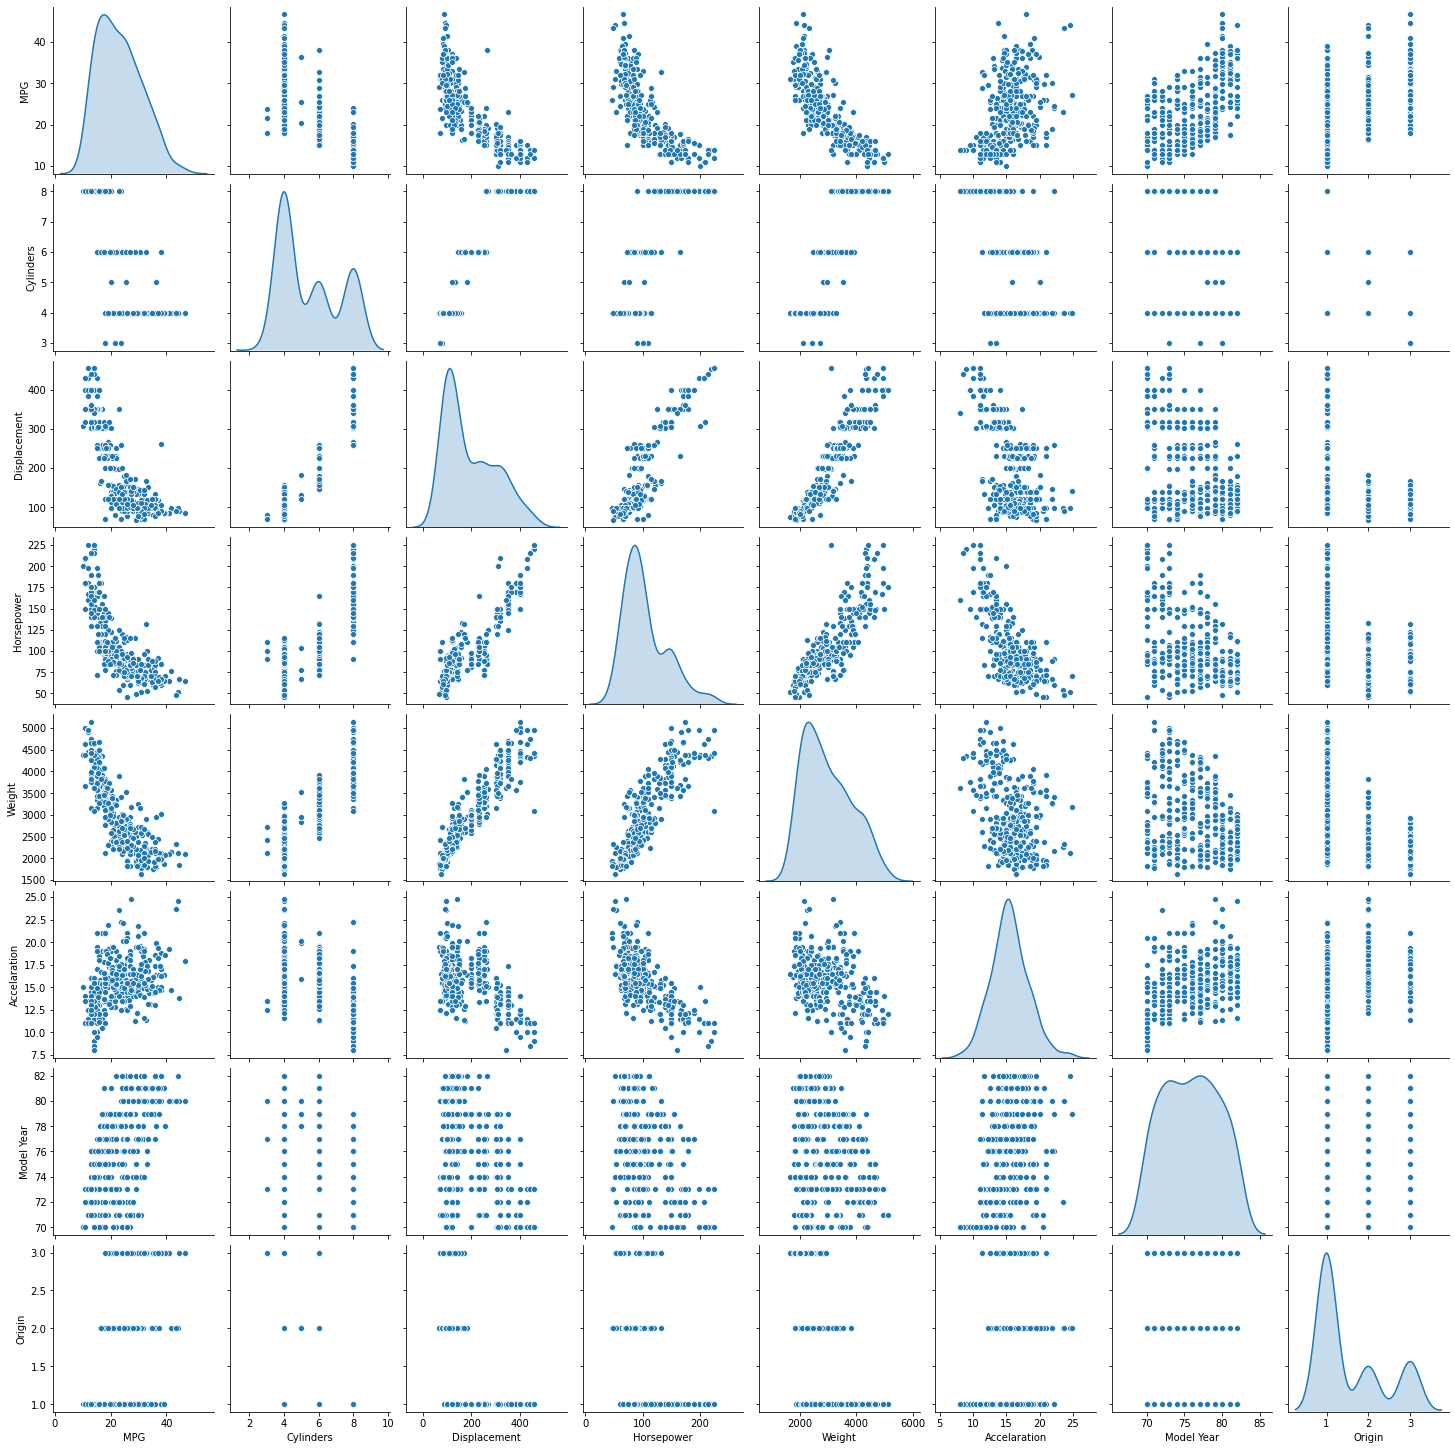

In [ ]:
sb.pairplot(train_dataset[['MPG','Cylinders','Displacement', 'Horsepower', 'Weight', 'Accelaration', 'Model Year', 'Origin']], diag_kind = 'kde')

In [ ]:
train_stats = train_dataset.describe()
train_stats.pop('MPG')
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Accelaration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
Origin,314.0,1.573248,0.800988,1.0,1.00,1.0,2.00,3.0


In [ ]:
train_labels = train_dataset.pop('MPG')
test_labels = test_dataset.pop('MPG')

•	Perform appropriate normalization technique.

In [ ]:
def norm(x):
  return (x - train_stats['mean'])/train_stats['std']
norm_train_data = norm(train_dataset)
norm_test_data = norm(test_dataset)

In [ ]:
norm_test_data.head()

,Cylinders,Displacement,Horsepower,Weight,Accelaration,Model Year,Origin
9,1.483887,1.865988,2.234620,1.018782,-2.530891,-1.604642,-0.715676
25,1.483887,1.578444,2.890853,1.925289,-0.559020,-1.604642,-0.715676
28,1.483887,1.041693,2.313368,2.063931,1.054328,-1.604642,-0.715676
31,-0.869348,-0.789008,-0.259066,-0.903250,-0.559020,-1.332580,1.781239
33,0.307270,0.351586,-0.127819,-0.422150,-0.917542,-1.332580,-0.715676


•	Build the NN model with adequate number of hidden layers, appropriate optimizer and loss functions.

In [ ]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation='relu'),
    
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [ ]:
model = build_model()

•	Display the model summary and give your explanation on number of trainable parameters.

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                512       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


In [ ]:
example_batch = norm_train_data[:10]
example_result = model.predict(example_batch)
example_result

array([[ 0.04690741],
       [-0.03101521],
       [-0.38770795],
       [ 0.05637797],
       [ 0.38210753],
       [-0.12353256],
       [ 0.44326854],
       [ 0.08327618],
       [-0.10768741],
       [ 0.62269086]], dtype=float32)

•	Fit the model by taking validation data as 20% of training data.

In [ ]:
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 1000

history = model.fit(
  norm_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2,verbose=1,  callbacks=[PrintDot()])

Epoch 1/1000
8/8 [==============================] - 0s 21ms/step - loss: 566.7189 - mae: 22.5874 - mse: 566.7189 - val_loss: 560.6168 - val_mae: 22.4107 - val_mse: 560.6168
Epoch 2/1000
8/8 [==============================] - 0s 4ms/step - loss: 519.2676 - mae: 21.5011 - mse: 519.2676 - val_loss: 510.8995 - val_mae: 21.2480 - val_mse: 510.8995
Epoch 3/1000
8/8 [==============================] - 0s 4ms/step - loss: 471.7646 - mae: 20.3575 - mse: 471.7646 - val_loss: 457.7079 - val_mae: 19.9518 - val_mse: 457.7079
Epoch 4/1000
8/8 [==============================] - 0s 4ms/step - loss: 419.5977 - mae: 19.0668 - mse: 419.5977 - val_loss: 398.7179 - val_mae: 18.4584 - val_mse: 398.7179
Epoch 5/1000
8/8 [==============================] - 0s 5ms/step - loss: 364.3120 - mae: 17.6119 - mse: 364.3120 - val_loss: 338.5593 - val_mae: 16.7967 - val_mse: 338.5593
Epoch 6/1000
8/8 [==============================] - 0s 4ms/step - loss: 306.7227 - mae: 15.9715 - mse: 306.7227 - val_loss: 276.6452 - val_

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,2.795398,1.070707,2.795398,8.865721,2.208315,8.865721,995
996,2.662745,1.030986,2.662745,8.819909,2.245575,8.819909,996
997,2.619937,1.031570,2.619937,8.838828,2.203089,8.838828,997
998,2.683521,1.047548,2.683521,8.780174,2.251832,8.780174,998
999,2.585075,1.018781,2.585075,8.958691,2.264603,8.958691,999


•	Plot the graph of Number of epochs vs/ training and validation loss

In [ ]:
from matplotlib import pyplot as plt

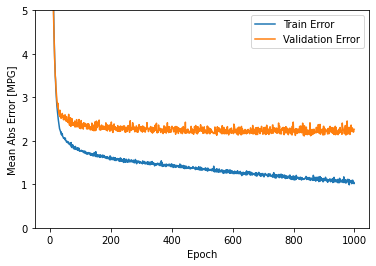

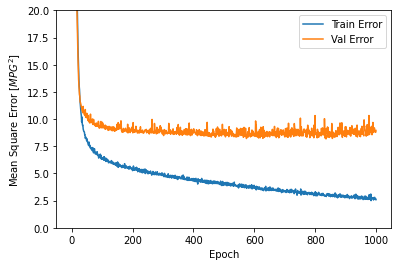

In [ ]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MPG]')
  plt.plot(hist['epoch'], hist['mae'], label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'], label = 'Validation Error')
  plt.ylim([0,5])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MPG^2$]')
  plt.plot(hist['epoch'], hist['mse'],label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'], label = 'Val Error')
  plt.ylim([0,20])
  plt.legend()
  plt.show()


plot_history(history)

•	Check whether any overfitting is there in the model. If yes, apply early stopping technique to avoid it.

In [ ]:
model = build_model()

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(norm_train_data, train_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=1, callbacks=[early_stop, PrintDot()])

Epoch 1/1000
8/8 [==============================] - 0s 18ms/step - loss: 584.5043 - mae: 22.9189 - mse: 584.5043 - val_loss: 578.9124 - val_mae: 22.7924 - val_mse: 578.9124
Epoch 2/1000
8/8 [==============================] - 0s 4ms/step - loss: 535.5933 - mae: 21.9009 - mse: 535.5933 - val_loss: 530.2534 - val_mae: 21.7719 - val_mse: 530.2534
Epoch 3/1000
8/8 [==============================] - 0s 4ms/step - loss: 488.7996 - mae: 20.8869 - mse: 488.7996 - val_loss: 478.6812 - val_mae: 20.6329 - val_mse: 478.6812
Epoch 4/1000
8/8 [==============================] - 0s 4ms/step - loss: 439.6727 - mae: 19.7573 - mse: 439.6727 - val_loss: 423.9731 - val_mae: 19.3372 - val_mse: 423.9731
Epoch 5/1000
8/8 [==============================] - 0s 4ms/step - loss: 386.8214 - mae: 18.4463 - mse: 386.8214 - val_loss: 364.8298 - val_mae: 17.8309 - val_mse: 364.8298
Epoch 6/1000
8/8 [==============================] - 0s 4ms/step - loss: 329.6631 - mae: 16.9220 - mse: 329.6631 - val_loss: 301.4015 - val_

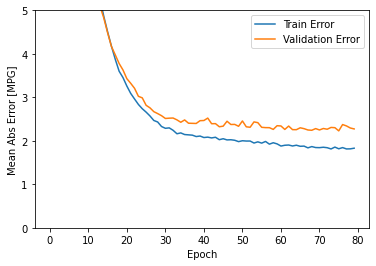

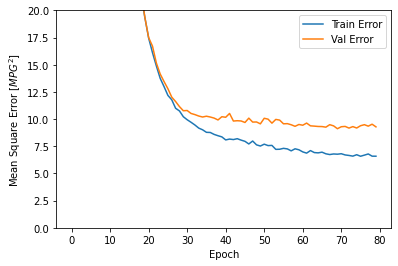

In [ ]:
plot_history(history)

•	Evaluate the model and predict it on testing data.

In [ ]:
loss, mae, mse = model.evaluate(norm_test_data, test_labels,verbose=0)

print("Testing set Mean Abs Error: {:5.2f} MPG".format(mse))

Testing set Mean Abs Error:  6.89 MPG


•	Draw a graph of actual values v/s predicted values (regression line and scatter plot)

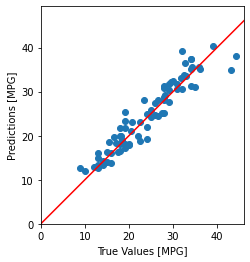

In [ ]:
test_predictions = model.predict(norm_test_data).flatten()
train_predictions = model.predict(norm_train_data).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
plt.plot([-100, 100], [-100, 100],color='red')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(test_labels, test_predictions)
print('Mean Squared Error: ',mse)
mae = mean_absolute_error(test_labels, test_predictions)
print('Mean Absolute Error: ',mae)
rsq = r2_score(train_labels,train_predictions) #R-Squared on the training data
print('R-square, Training: ',rsq)
rsq = r2_score(test_labels,test_predictions) #R-Squared on the testing data
print('R-square, Testing: ',rsq)

Mean Squared Error:  6.888526332863448
Mean Absolute Error:  2.046629602481157
R-square, Training:  0.8845658688677511
R-square, Testing:  0.8945203965127854


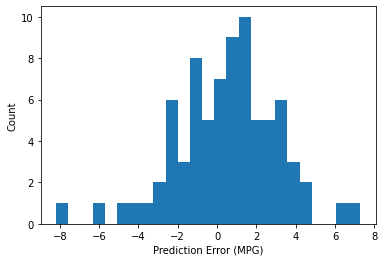

In [ ]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error (MPG)")
a = plt.ylabel('Count')